In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9136 - val_loss: 0.1441 - val_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1414 - accuracy: 0.9584 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1051 - accuracy: 0.9676 - val_loss: 0.0825 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9731 - val_loss: 0.0783 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9761 - val_loss: 0.0799 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.0730 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9816 - val_loss: 0.0694 - val_accuracy:

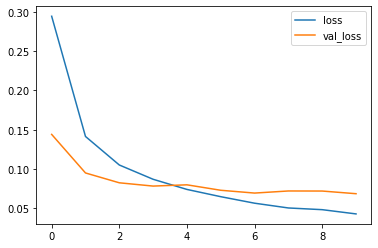

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

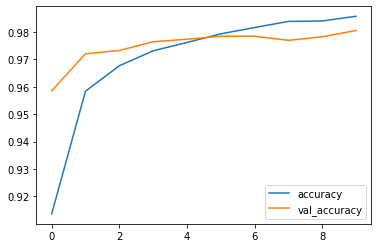

In [8]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [9]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9805
[0.06858641654253006, 0.9804999828338623]


Confusion matrix, without normalization
[[ 973    0    0    0    2    1    1    0    1    2]
 [   0 1125    4    0    0    2    1    1    2    0]
 [   4    0 1008    4    4    0    3    3    6    0]
 [   0    0    3  995    0    2    0    2    2    6]
 [   1    0    2    0  966    0    5    1    0    7]
 [   2    0    0   13    1  867    6    0    2    1]
 [   5    2    0    1    2    7  940    0    1    0]
 [   1    3   12    5    0    0    0 1001    1    5]
 [   3    0    1    4    6    6    1    3  945    5]
 [   5    2    0    3    9    1    0    4    0  985]]


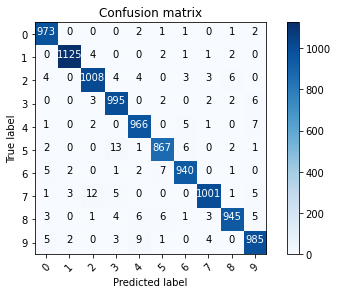

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 4 Predicted: 9')

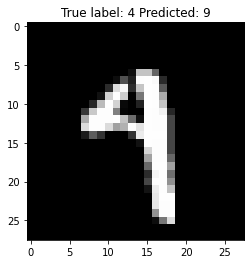

In [25]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))